<a href="https://colab.research.google.com/github/gerardcalabrese/HCSPD2024/blob/main/actividad_5_pendulo_invertido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 5
Se selecciona para esta actividad el problema del pendulo invertido. El mismo se ha resuelto con Octave en la Actividad 3.
En este caso, se procede a su solución programando en espacios de estado en el lenguaje R.

In [ ]:
# Se debe importar la libreria de trabajo
library(tidyverse) #una versión simplificada está cargada por defecto en el Colab

## Simulación numérica de péndulo en equilibrio estable

Para el caso de la linealización de sistemas dinámicos, como el péndulo en su equilibrio **estable**, se puede linealizar aplicando Taylor a las ecuaciones cuando $\phi \approx π$



<!-- $(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot (\pi-\phi) -Fricc\cdot \dot{\delta}$,
$Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}$ -->
$\begin{equation*}
\begin{cases}
(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} - m\cdot long \cdot \dot{\phi}^2 \cdot (\pi-\phi) -Fricc\cdot \dot{\delta} \\
Long \cdot \ddot{\phi} = -g \cdot (\pi-\phi) - \ddot{\delta}
\end{cases}
\end{equation*}$

en el punto de operación $x=[ \delta,\dot{\delta},\phi,\dot{\phi}]^T$, valuado en $[0,0,\pi,0]^T$.
Primero se trata de despejar las funciones $\ddot{\delta}$ y $\ddot{\phi}$.
Ahora se procede a realizar las derivadas de las funciones $\ddot{\delta}$ y $\ddot{\phi}$ respecto de las cuatro variables, que son $\delta$, $\dot{\delta}$, $\phi$, y $\ddot{\phi}$.

In [ ]:
## Creo un vector para los espacios de estado
X = c(0,0,0,0)
#X = [rho, phi, rho_p, phi_p]

## Defino la dimension de la matriz (vector columna) con el comando dim
dim(X) <- c(4,1)

##Defino el tiempo de integración y demas variables conocidas
Dt = 1e-3
tiempo_fin = 10
m=.1; F=0.1; long=0.6;g=9.81;M=.5;
u = 0
# Establezco el valor inicial de los parámetros de estado
Xo = c(0,pi,0,0)
dim(Xo) <- c(4,1)
# Creo las matrices correspondientes a los parametros de estado
A    <- c(0,0,1.0,0, 0,0,0,1.0, 0,-((g*m)/(M))-((long*m*X[4,1]^2)/(M)),-(F/M),0, 0,-(g*(M+m))/(M*long)-((long*m*X[4,1]^2)/(M*long)),-((F)/(M*long)),0);
dim(A) <- c(4,4) #print(A)
A<-t(A)
print("La matriz A es")
print(A)
# Mat_B=[0; 1/M; 0; 1/(long*M)]
B <-    c(0,0,1/M,(1/(M*long)))
dim(B) <- c(4,1)#genero matriz 4x1 filaXcolumna
print("La matriz B es")
print(B)

### Realizo la integracion por Euler
#Inicializo los vectores correspondientes a la derivada del vector de estado
ii = 0
Xp = c(0,0,0,0)
dim(Xp) = c(4,1)
for(i in 1:(tiempo_fin/Dt)) {
    ii<-ii+1
    #tengo que crear un vector columna auxiliar. Después lo agrego a la matriz
    xo_aux = (X[,ii]-Xo[,1])
    dim(x_aux) = c(4,1)

    xp_aux = A %*% xo_aux + B%*% u # tengo que crear este vector auxiliar
    Xp = cbind(Xp,xp_aux)  # Incoporo el vector auxiliar a lo existente

    x_aux = X[,ii]+ Xp[,ii]*Dt
    X = cbind(X,x_aux)
}



[1] "La matriz A es"
     [,1]    [,2]       [,3] [,4]
[1,]    0   0.000  1.0000000    0
[2,]    0   0.000  0.0000000    1
[3,]    0  -1.962 -0.2000000    0
[4,]    0 -19.620 -0.3333333    0
[1] "La matriz B es"
         [,1]
[1,] 0.000000
[2,] 0.000000
[3,] 2.000000
[4,] 3.333333


In [ ]:
rho = X[1,]
phi = X[2,]
rho_p = X[3,]
phi_p = X[4,]
t1<-seq(from=0,to=tiempo_fin,by=Dt)

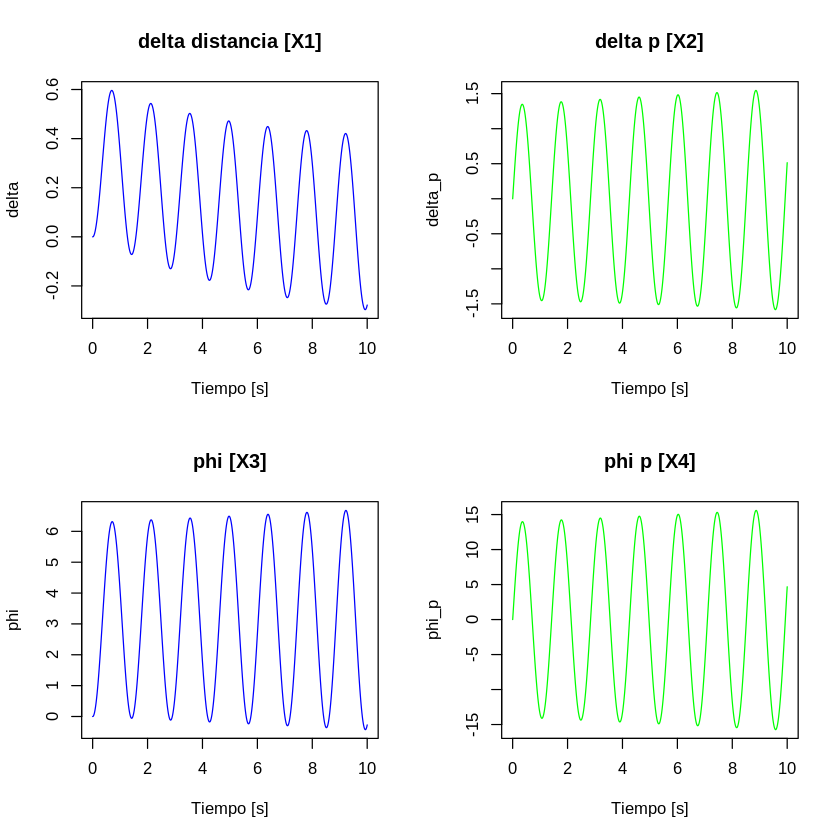

In [ ]:
par(mfrow=c(2,2))
plot(xy.coords(t1, rho), type = "s",    main="delta distancia [X1]", col = "blue", lwd = 1,xlab="Tiempo [s]", ylab="delta")
plot(xy.coords(t1, rho_p), type = "s",     main="delta p [X2]", col = "green", lwd = 1,xlab="Tiempo [s]", ylab="delta_p")
plot(xy.coords(t1, phi), type = "s",     main="phi [X3]", col = "blue", lwd = 1,xlab="Tiempo [s]", ylab="phi")
plot(xy.coords(t1, phi_p), type = "s",     main="phi p [X4]", col = "green", lwd = 1,xlab="Tiempo [s]", ylab="phi_p")